In [2]:
#import subprocess
#output = subprocess.check_output("which python3", shell=True)
#output

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import logging
import os
import inspect
import numpy as np
import pandas as pd

Matplotlib is building the font cache using fc-list. This may take a moment.


In [34]:
import pvlib as pvlib
from pvlib.location import Location
#import ether.pvlib as epvlib
#from ether.pvlib.location import Location as eLocation

In [36]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
#etus = eLocation(32.2, -111, 'US/Arizona', 700, 'Tucson')

In [38]:
print(type(tus))
print(tus)

#print(type(etus))
#print(etus)

<class 'pvlib.location.Location'>
Location: 
  name: Tucson
  latitude: 32.2
  longitude: -111
  altitude: 700
  tz: US/Arizona


                           apparent_zenith      zenith  apparent_elevation  \
2014-06-24 00:00:00-07:00       124.039086  124.039086          -34.039086   
2014-06-24 00:01:00-07:00       124.065488  124.065488          -34.065488   
2014-06-24 00:02:00-07:00       124.090882  124.090882          -34.090882   
2014-06-24 00:03:00-07:00       124.115267  124.115267          -34.115267   
2014-06-24 00:04:00-07:00       124.138641  124.138641          -34.138641   
2014-06-24 00:05:00-07:00       124.161003  124.161003          -34.161003   
2014-06-24 00:06:00-07:00       124.182351  124.182351          -34.182351   
2014-06-24 00:07:00-07:00       124.202686  124.202686          -34.202686   
2014-06-24 00:08:00-07:00       124.222004  124.222004          -34.222004   
2014-06-24 00:09:00-07:00       124.240306  124.240306          -34.240306   
2014-06-24 00:10:00-07:00       124.257591  124.257591          -34.257591   
2014-06-24 00:11:00-07:00       124.273856  124.273856          

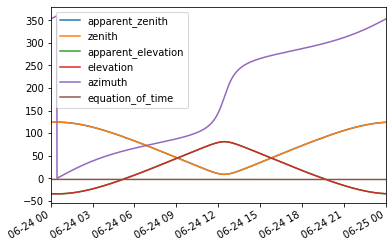

In [39]:
times = pd.date_range(start=datetime.datetime(2014,6,24), end=datetime.datetime(2014,6,25), freq='1Min', tz=tus.tz)
solpos = pvlib.solarposition.get_solarposition(times, tus.latitude, tus.longitude)
print(solpos)
#solpos = solpos.exec() #Not sure what happens at this spot, that the cluster just dies.
#print(solpos.head())
solpos.plot()

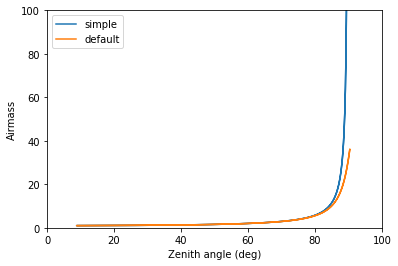

In [7]:
plt.plot(solpos['zenith'], pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']), label='default')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Zenith angle (deg)')
plt.ylabel('Airmass')
plt.legend()

(0, 100)

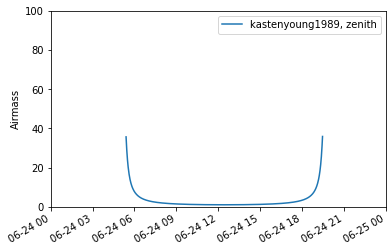

In [41]:
pvlib.atmosphere.get_relative_airmass(solpos['zenith']).plot(label='kastenyoung1989, zenith')
#pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']).plot(label='kastenyoung1989, app. zenith')
#pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='young1994').plot(label='young1994, zenith')
#pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='simple').plot(label='simple, zenith')
plt.legend()
plt.ylabel('Airmass')
plt.ylim(0,100)


In [ ]:
import ether.pvlib as epvlib
obj = epvlib.atmosphere.get_relative_airmass(solpos['zenith']).exec()
obj.plot(label='kastenyoung1989, zenith')
plt.legend()
plt.ylabel('Airmass')
plt.ylim(0,100)